# Distribution of clusters within perturbation

What is the variation of cluster size within perturbation (cell-cell heterogeneity) -- these might be clusters to merge

In [1]:
from campa.tl import Experiment, FeatureExtractor, thresholded_count, thresholded_median
from campa_ana.constants import SOURCE_DIR
from pathlib import Path
from campa.pl import hex2rgb
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import pandas as pd

2022-11-09 16:08:38.574919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 16:08:55.898362: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-09 16:08:57.901720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-09 16:08:57.901770: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Reading config from /home/icb/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini


In [60]:
fig_dir = Path(SOURCE_DIR)/'figures'/'fig1_suppl'
os.makedirs(str(fig_dir), exist_ok=True)

## VAE_all/CondVAE_pert-CC

In [2]:
exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')
extrs = {data_dir: FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad')) 
    for data_dir in exp.data_params['data_dirs']}

In [3]:
annotation = exp.get_cluster_annotation(cluster_name='clustering_res0.5')
annotation

,clustering_res0.5,clustering_res0.5_colors,annotation,annotation_colors,annotation_coarse,annotation_coarse_colors,annotation_fine,annotation_fine_colors
index,,,,,,,,
0,0,#1f77b4,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2,Nucleoplasm.1,#118ab2
1,1,#ff7f0e,Nucleolus,#073b4c,Nucleolus,#073b4c,Nucleolus,#073b4c
2,2,#2ca02c,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2,Nucleoplasm.2,#11aab2
3,3,#d62728,Nuclear speckles,#ffd166,Nuclear speckles,#ffd166,Nuclear speckles,#ffd166
4,4,#9467bd,Extra-nuclear,#c6beaa,Extra-nuclear,#c6beaa,Extra-nuclear,#c6beaa
5,5,#c49c94,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2,Nucleoplasm.3,#25b9ea
6,6,#f7b6d2,Nuclear periphery,#06d6a0,Nucleoplasm,#118ab2,Nuclear periphery,#06d6a0
7,7,#c7c7c7,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2,Nucleoplasm.4,#116fb2
8,8,#dbdb8d,PML bodies,#ef476f,PML bodies,#ef476f,PML bodies,#ef476f


In [12]:
sizes = []
perturbation = []
well = []
for extr in extrs.values():
    sizes.append(extr.adata.obsm['size'])
    perturbation.append(extr.adata.obs['perturbation_duration'])
    well.append(extr.adata.obs['well_name'])

sizes = pd.concat(sizes)
perturbation = pd.concat(perturbation)
well = pd.concat(well)

In [13]:
sizes['perturbation'] = perturbation
sizes['well'] = well

In [7]:
mean = sizes.groupby('perturbation').mean()
std = sizes.groupby('perturbation').std()

In [14]:
sizes.groupby('well').mean()

/tmp/ipykernel_9444/4014778544.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sizes.groupby('well').mean()


,all,0,1,2,3,4,5,6,7,8,9
well,,,,,,,,,,,
I09,12959.073609,3665.403950,2368.450628,1296.651706,1223.518851,1184.716338,966.256732,1180.495512,326.134650,582.472172,164.973070
I10,11855.092885,801.011858,2165.907115,1932.869565,1913.624506,1477.152174,930.288538,1100.778656,731.395257,693.219368,108.845850
I11,12907.009302,2756.035659,2580.536434,1957.776744,1297.886822,1036.406202,1082.762791,711.629457,802.934884,505.691473,175.348837
I12,15187.312303,1438.429022,2508.712934,4179.558360,1812.312303,1257.712934,1950.895899,965.063091,391.328076,575.731861,107.567823
I13,14371.518727,787.147940,1696.028090,5042.739700,1754.872659,1417.777154,1053.509363,746.114232,1130.170412,678.934457,64.224719
I14,12321.420455,3169.365530,2511.905303,892.035985,1289.155303,1225.776515,953.348485,1313.560606,314.625000,558.240530,93.407197
I16,12500.734198,2851.606159,2501.132901,1388.324149,1293.487844,1428.612642,1068.393841,825.797407,542.811994,477.406807,123.160454
I17,13257.586160,1393.841248,2616.869742,2574.287653,1558.411126,1492.643148,1055.230665,687.500678,1277.569878,527.392130,73.839891
I18,12579.368327,3027.306050,1250.482206,1563.236655,1272.430605,1364.829181,1401.829181,1421.492883,368.635231,726.944840,182.181495


In [8]:
mean

,all,0,1,2,3,4,5,6,7,8,9
perturbation,,,,,,,,,,,
AZD4573-120,14197.841484,944.996627,1719.575885,4280.552277,1718.436762,1601.040472,1097.733558,923.457841,1129.837268,715.983980,66.226813
AZD4573-30,13337.011843,1339.613800,2400.796087,2916.632338,1588.716787,1487.519053,1026.428424,860.842430,1097.998455,559.230175,59.234295
CX5461-120,12759.428479,3364.347294,1186.092139,1413.659149,1318.350515,1421.540593,1279.289948,1548.917526,408.686856,653.285438,165.259021
DMSO-120,12321.420455,3169.365530,2511.905303,892.035985,1289.155303,1225.776515,953.348485,1313.560606,314.625000,558.240530,93.407197
DMSO-720,12369.759076,3036.778878,2312.348185,1475.689769,1195.155116,1159.074257,1132.194719,1134.237624,307.417492,498.331683,118.531353
Meayamycin-720,15509.854305,1476.434437,2520.174834,3935.059603,1934.639735,1438.724503,1915.679470,1154.388079,336.917881,672.145695,125.690066
TSA-30,12694.455394,3052.710787,2490.278134,1423.442566,1240.662391,1464.527697,949.816327,929.580758,452.576676,569.891545,120.968513
Triptolide-120,12065.223969,668.166012,2202.480354,2634.290766,1843.164047,1439.950884,847.158153,961.704322,797.352652,573.746562,97.210216
normal,12804.069128,2919.615868,2463.324823,1671.243519,1232.456009,1146.961508,1057.182639,906.608013,643.304792,633.589552,129.782404


In [9]:
std

,all,0,1,2,3,4,5,6,7,8,9
perturbation,,,,,,,,,,,
AZD4573-120,3840.326983,1491.932496,992.918335,3921.051578,559.069486,643.327048,2371.379075,1271.245610,1592.896328,299.992251,75.431350
AZD4573-30,3625.466365,1673.794858,1079.125124,2889.132960,561.635812,444.478815,1992.437301,1107.836004,1517.894952,234.884968,51.291815
CX5461-120,3386.360019,2696.580175,494.535505,1987.321020,615.776104,547.729217,2466.403738,1064.962108,935.082251,316.624478,306.178827
DMSO-120,2989.891529,2095.158197,794.854512,1285.015745,536.675792,382.087400,1855.317429,865.190622,723.196444,210.901996,60.649574
DMSO-720,3111.817725,2169.710541,821.475962,1689.649375,549.656361,398.987180,2115.228789,844.891546,612.596489,219.770776,70.086734
Meayamycin-720,4164.781914,2194.454988,720.753712,3485.456007,652.116334,798.511030,2076.830814,1210.873543,884.090428,282.346768,75.904113
TSA-30,3192.092709,2137.617649,821.678711,1709.919490,518.243136,504.143399,1900.183210,752.205121,804.325978,261.312156,72.285309
Triptolide-120,3015.998968,995.387697,982.184918,2384.899299,676.765796,480.325274,2050.066012,1140.886379,1156.858736,305.161699,73.206440
normal,3433.357769,2218.468714,864.088724,1843.447395,588.704343,483.055321,1957.274594,811.725448,1076.916947,300.528857,103.403791


## within perturbation variation

/tmp/ipykernel_9444/4119016279.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = sizes.groupby('well').std()[[str(i) for i in range(10)]] / sizes.groupby('well').mean()[[str(i) for i in range(10)]]
/tmp/ipykernel_9444/4119016279.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = sizes.groupby('well').std()[[str(i) for i in range(10)]] / sizes.groupby('well').mean()[[str(i) for i in range(10)]]
/home/icb/hannah.spitzer/miniconda3/envs/campa/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead

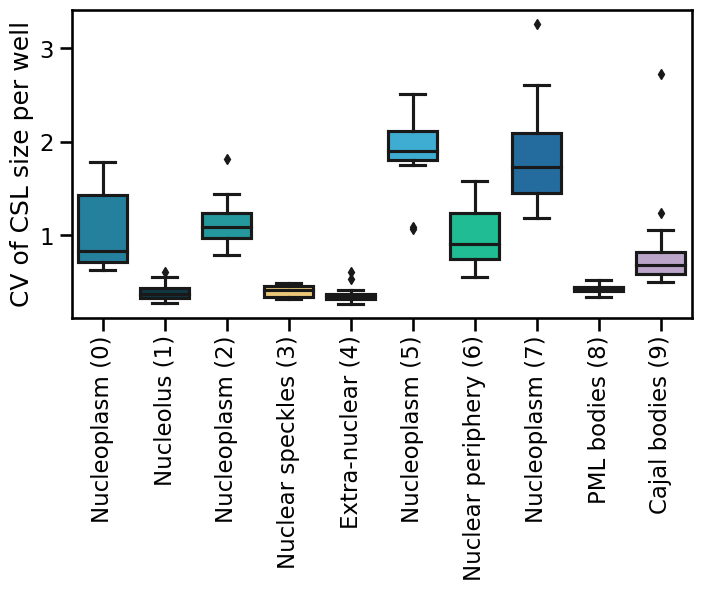

In [61]:
# plot well-wise mean and std
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(8,4))

data = sizes.groupby('well').std()[[str(i) for i in range(10)]] / sizes.groupby('well').mean()[[str(i) for i in range(10)]]

cmap = annotation.set_index('clustering_res0.5')['annotation_fine_colors'].to_dict()
sns.boxplot(data, ax=ax, palette=cmap)
ax.set_xticklabels([f"{annotation.loc[i]['annotation']} ({i})" for i in range(10)], rotation=90)
ax.set_ylabel('CV of CSL size per well')
plt.savefig(fig_dir / 'cluster_size_variation.png', dpi=300, bbox_inches='tight')

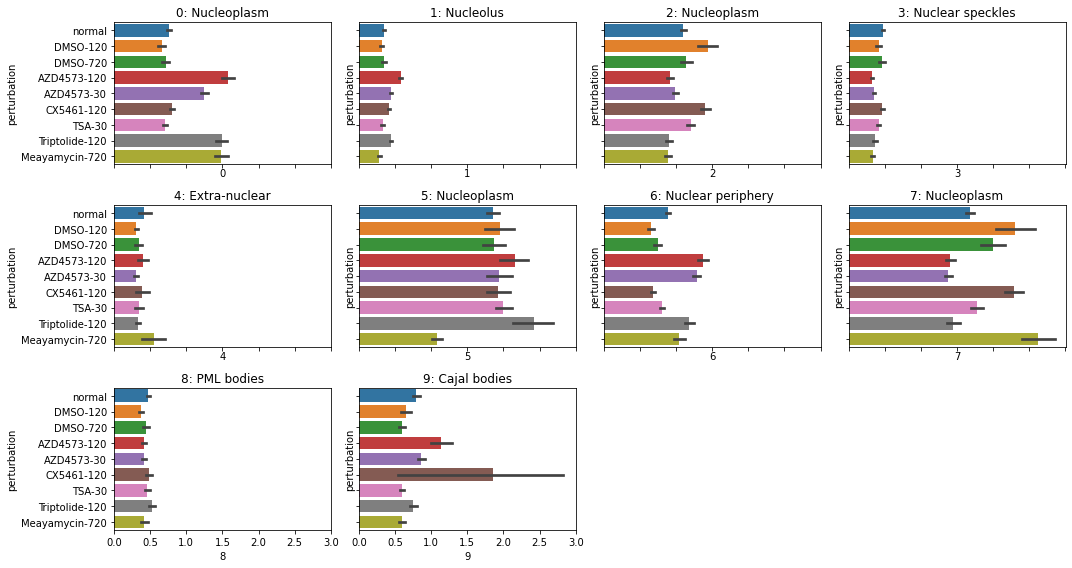

In [42]:
# OLD: per perturbation within variation of size: std/mean
estimator = lambda x: x.std()/x.mean()

fig, axes = plt.subplots(3,4, figsize=(15,8), sharey=True, sharex=True)
for i, ax in enumerate(axes.flat):
    if i > 9:
        ax.axis('off')
        continue
    sns.barplot(data=sizes, x=str(i), y='perturbation', ax=ax, estimator=estimator)
    ax.set_title(f"{i}: {annotation.loc[i]['annotation']}")
plt.tight_layout()

## accross perturbation variation

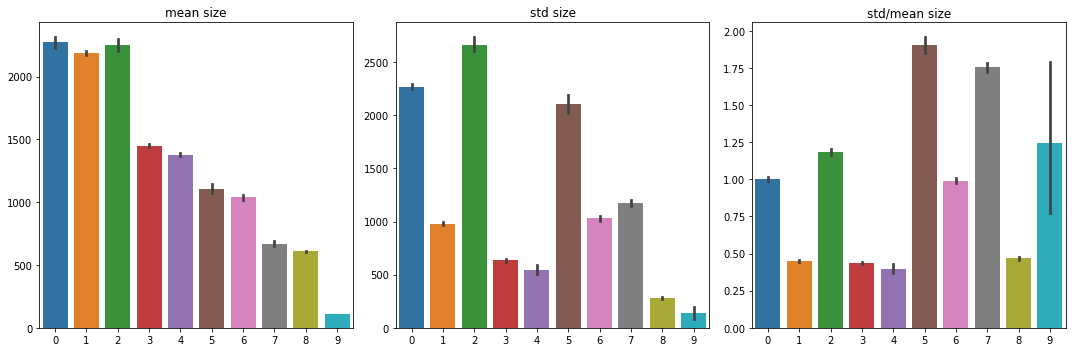

In [53]:

fig, axes = plt.subplots(1,3, figsize=(15,5))

estimator = lambda x: x.mean()
sns.barplot(data=sizes[['0','1','2','3','4','5','6','7','8','9']], ax=axes[0], estimator=estimator)
axes[0].set_title('mean size')

estimator = lambda x: x.std()
sns.barplot(data=sizes[['0','1','2','3','4','5','6','7','8','9']], estimator=estimator, ax=axes[1])
axes[1].set_title('std size')

estimator = lambda x: x.std()/x.mean()
sns.barplot(data=sizes[['0','1','2','3','4','5','6','7','8','9']], estimator=estimator, ax=axes[2])
axes[2].set_title('std/mean size')

plt.tight_layout()